In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
lr = input("What is lr?(01/001)")
print(f"lr is .{lr}")

lr is .01


In [3]:
test = pd.read_csv(f'./epi_{lr}/test.csv',delimiter='\t',header=None)
y = test[2]
y_pred = test[3]


In [4]:
test_acc = accuracy_score(y, y_pred)
round(test_acc ,7)

0.6503009

In [5]:
val = pd.read_csv(f'./epi_{lr}/val.csv',delimiter='\t',header=None)
y = val[2]
y_pred = val[3]

In [6]:
val_acc = accuracy_score(y, y_pred)
val_acc

0.7291610304505967

In [7]:
train_results = pd.read_csv(f'./epi_{lr}/train.csv',delimiter='\t',header=None)
(train_results.head(3))
# Loss  Accuracy Precision1 Precision0 Recall1 Recall0 F1Macro F1Micro AUC

,0,1,2,3,4,5,6,7,8
0,18247.8984,0.7102,0.7666,0.6735,0.6041,0.8162,0.7069,0.7102,0.7869
1,17843.1310,0.7169,0.7378,0.6994,0.6726,0.7611,0.7163,0.7169,0.7951
2,17849.6590,0.7154,0.7211,0.7100,0.7022,0.7286,0.7153,0.7154,0.7975


In [8]:
accuracy = train_results[1]
accuracy.mean()

np.float64(0.72126)

In [9]:
# loss = train_results[0]
# accuracy = train_results[1]
# precision1 = train_results[2]     #training 
# precision0 = train_results[3]     # test
# recall1 = train_results[4]
# recall0 = train_results[5]
# f1macro = train_results[6]
# f1micro = train_results[7]
# auc = train_results[8]

In [10]:
def visualize_metrics(train_results):
    
    # loss, accuracy, precision_train, precision_val, recall_train, recall_val, f1macro, f1micro, auc = train_results
    loss = train_results[0]
    accuracy = train_results[1]
    precision_train = train_results[2]
    precision_val = train_results[3]
    recall_train = train_results[4]
    recall_val = train_results[5]
    f1macro = train_results[6]
    f1micro = train_results[7]
    auc = train_results[8]

    print("Average loss", round(loss.mean(),2))
    print("Average accuracy", round(accuracy.mean(),2))
    print("Average precision_train", round(precision_train.mean(),2))
    print("Average precision_val", round(precision_val.mean(),2))
    print("Average recall_train", round(recall_train.mean(),2))
    print("Average recall_val", round(recall_val.mean(),2))
    print("Average f1macro", round(f1macro.mean(),2))
    print("Average f1micro", round(f1micro.mean(),2))
    print("Average auc", round(auc.mean(),2))

    
    metrics = [
        ("Loss", [loss, None]),
        ("Accuracy", [accuracy, None]),
        ("Precision", [precision_train, precision_val]),
        ("Recall", [recall_train, recall_val]),
        ("F1", [f1macro, f1micro]),
        # ("F1 Micro", [f1micro, None]),
        ("AUC", [auc, None]),
    ]

    
    fig, axs = plt.subplots(len(metrics), 1, figsize=(10, len(metrics) * 3))

    for i, (metric_name, values) in enumerate(metrics):
        ax = axs[i] if len(metrics) > 1 else axs

        train_value, val_value = values
        if train_value is not None:
            ax.plot(train_value, label=f"Training {metric_name}", color="blue")

        
        if val_value is not None:
            ax.plot(val_value, label=f"Validation {metric_name}", color="orange")

        
        # ax.set_title(metric_name)
        ax.set_xlabel("Epochs")
        ax.set_ylabel(metric_name)
        ax.legend()
        ax.grid(True)

    
    plt.tight_layout()
    plt.savefig(f'epi_{lr}/epi_{lr}_metrics.png')
    plt.show()

Average loss 17882.63
Average accuracy 0.72
Average precision_train 0.75
Average precision_val 0.7
Average recall_train 0.68
Average recall_val 0.77
Average f1macro 0.72
Average f1micro 0.72
Average auc 0.8


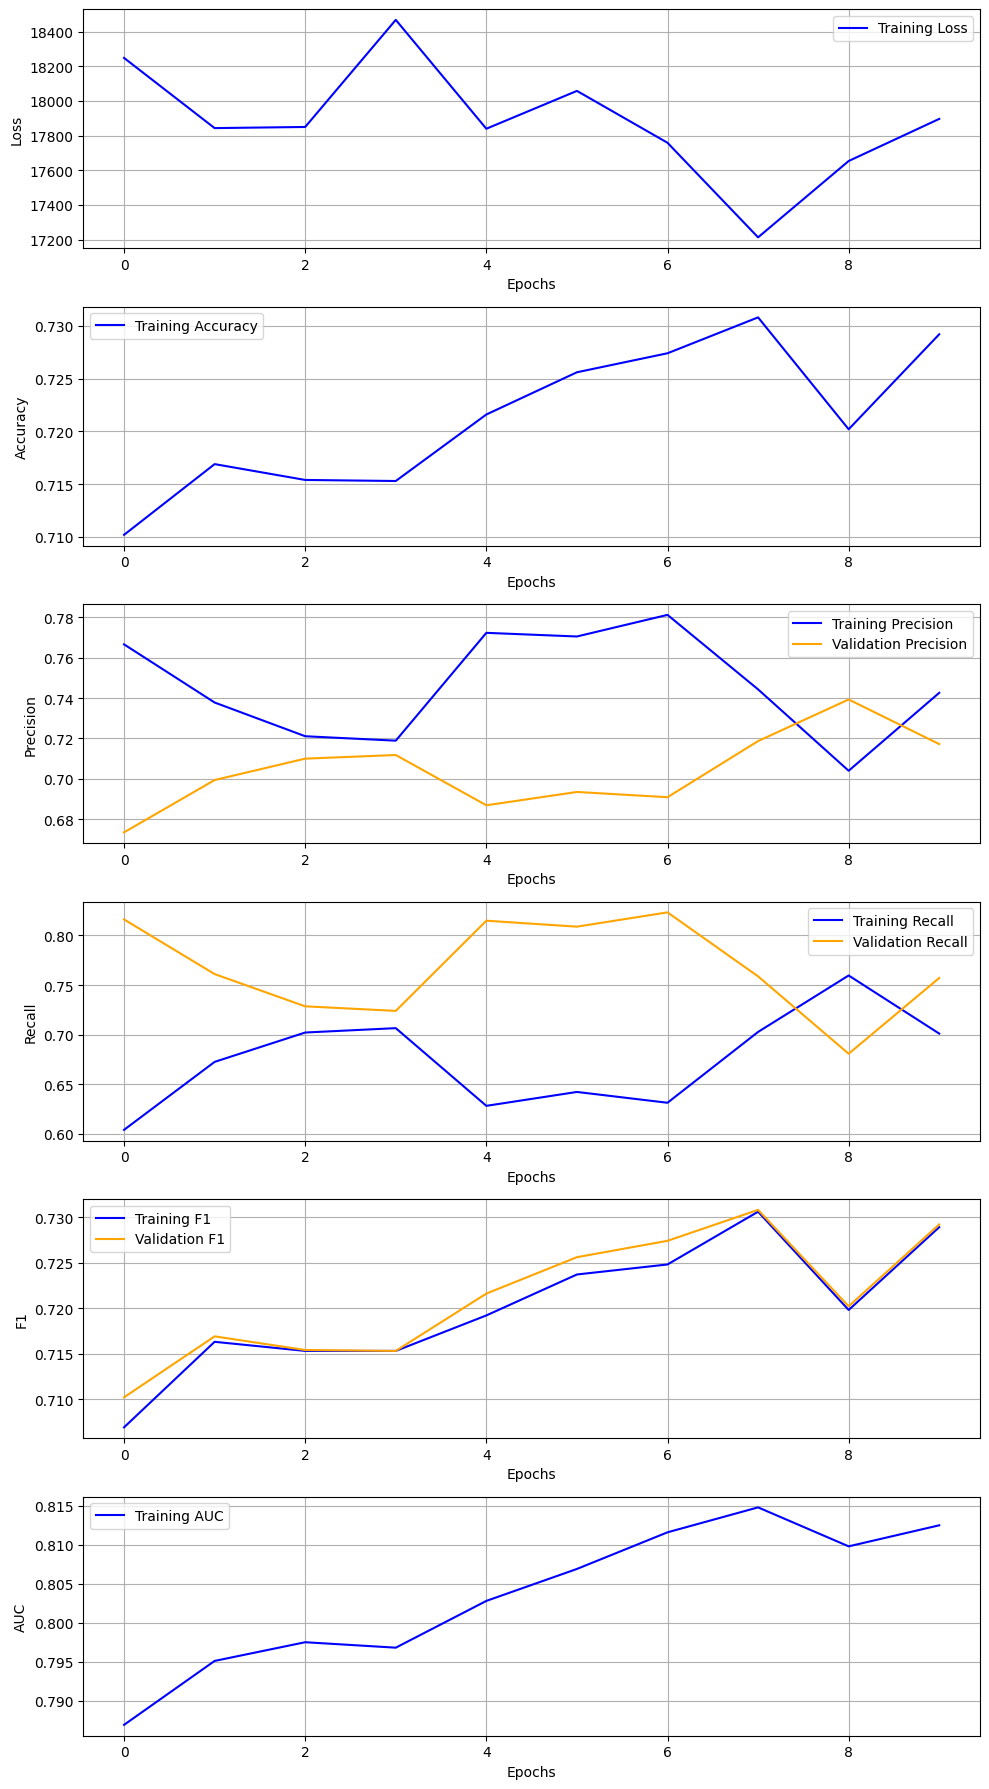

In [11]:
# train_results
visualize_metrics(train_results)